# Download dataset

In [ ]:
!wget -O ./dataset/CommonLanguage.zip "https://huggingface.co/datasets/common_language/resolve/main/data/CommonLanguage.zip"

# Unzipp dataset

In [ ]:
!rm -r ./common_voice_kpd
!unzip ./dataset/CommonLanguage.zip -d /home/soumen/LID/dataset/
!rm ./dataset/*.zip

In [25]:
import os
import sys

#if not os.path.exists('/home/soumen/LID/GitHub/git/Spoken_language_identification'):
if not os.path.exists('./Spoken_language_identification'):
  !git clone  -q --depth 1 https://github.com/SpeechFlow-io/Spoken_language_identification.git

#%cd /home/soumen/LID/GitHub/git/Spoken_language_identification
%cd ./Spoken_language_identification

#Spoken_language_identification import
import tensorflow as tf
import librosa
import json
from vocab.vocab import Vocab

# imports for uploading/recording
import torchaudio
import io
import base64
import tempfile
from typing import Optional
from pydub import AudioSegment
from IPython import display as _display
from IPython.display import Audio, clear_output, display
import ipywidgets as widgets
from scipy.io import wavfile
import numpy as np
import pandas as pd

/home/soumen/LID/GitHub/git/Spoken_language_identification


# CREATING THE MODEL AND DEMO RUN

In [26]:
vocab = Vocab("vocab/vocab.txt")

model = tf.saved_model.load('./saved_models/lang14/pb/2')
#some test audios are provided in test_audios files (chinese.wav, english.wav, french.wav, german.wav, italian.wav, japanese.wav, korean.wav, portuguese.wav,
#russian.wav, spanish.wav, vietnamese), you can specify an audio file to run.
audio_file = './test_audios/german.wav'     #english.wav'
signal, _ = librosa.load(audio_file, sr=16000)
lang_id, prob = model.predict_pb(signal)
# print(model.predict_pb(signal))
# print("\n")
language = vocab.token_list[lang_id.numpy()]
probability = prob.numpy()*100
print("{} is predicted as {} and it's probability={:.2f}% ".format(audio_file, language, probability))

./test_audios/german.wav is predicted as german and it's probability=99.98% 


In [27]:
def predict_language(path):
  audio_file = path
  signal, _ = librosa.load(audio_file, sr=16000)
  lang_id, prob = model.predict_pb(signal)
  language = vocab.token_list[lang_id.numpy()]
  probability = prob.numpy()*100
  return language,probability

In [28]:
%cd /
#print(predict_language('/home/soumen/LID/GitHub/git/Spoken_language_identification/data/wavs/chinese/audio/test/983540233864149941.wav'))
print(predict_language('./Spoken_language_identification/data/wavs/chinese/audio/test/983540233864149941.wav'))
#res,_=model.predict_pb('/home/soumen/LID/git/Spoken_language_identification/test_audios/french.wav');  #english.wav');

/
('chinese', 99.99749660491943)


# language evaluation

In [29]:
test_language_list=['Chinese_China','English','French','German','Indonesian','Italian','Japanese','Portuguese','Russian','Spanish','Turkish','Not_in_list']
lang_index_dict={test_language_list[i]:i for i in range(len(test_language_list))}
print(lang_index_dict)
print(type(lang_index_dict.get('english')))

{'Chinese_China': 0, 'English': 1, 'French': 2, 'German': 3, 'Indonesian': 4, 'Italian': 5, 'Japanese': 6, 'Portuguese': 7, 'Russian': 8, 'Spanish': 9, 'Turkish': 10, 'Not_in_list': 11}
<class 'NoneType'>


In [30]:
def get_result(lang_label):
    print('\n\n'+lang_label.upper())

    list=[0 for i in range(len(test_language_list))]
    grand_total_records=0
    grand_total_correct_prediction=0

    #for dev_data
    total_records=0
    correct_prediction=0
    #data=pd.read_csv('/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/dev.csv'.format(lang_label),encoding='utf-16le', sep='\t')
    data=pd.read_csv('./dataset/common_voice_kpd/{}/dev.csv'.format(lang_label),encoding='utf-16le', sep='\t')    # dev.csv'.format(lang_label),encoding='windows-1252'utf8)
    #print(data.columns)
    # Clean up column names
    data.columns = data.columns.str.strip()
    #print(data.columns)
    #folder_path='/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/dev'.format(lang_label)#.capitalize())
    folder_path='./dataset/common_voice_kpd/{}/dev'.format(lang_label)#.capitalize())
    #print(folder_path)
    for index, row in data.iterrows():
        folder_name = row['client_id']
        #print(folder_name)
        file_name = row['path']
        full_path=folder_path+'/'+folder_name+'/'+file_name;
        language_predicted=predict_language(full_path)[0]
        #print(language_predicted.capitalize())
        language_predicted = language_predicted.capitalize()
        if language_predicted == "Chinese" :
            language_predicted = "Chinese_China"
        if language_predicted in test_language_list:
          list[lang_index_dict.get(language_predicted)]+=1
        else:
          list[11]+=1
        if language_predicted==lang_label:
          correct_prediction+=1
        total_records+=1
    print('folder :: {}\t total_record :: {}\t correct_prediction :: {}\t accuracy :: {} %'.format('dev',total_records,correct_prediction,correct_prediction/total_records*100))

    grand_total_records+=total_records
    grand_total_correct_prediction+=correct_prediction

    #for test_data
    total_records=0
    correct_prediction=0
    #data=pd.read_csv('/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/test.csv'.format(lang_label),encoding='utf-16le', sep='\t')
    data=pd.read_csv('./dataset/common_voice_kpd/{}/test.csv'.format(lang_label),encoding='utf-16le', sep='\t')   #'windows-1252')
    # Clean up column names
    data.columns = data.columns.str.strip()
    #folder_path='/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/test'.format(lang_label)#.capitalize())
    folder_path='./dataset/common_voice_kpd/{}/test'.format(lang_label)#.capitalize())

    for index, row in data.iterrows():
        folder_name = row['client_id']
        file_name = row['path']
        full_path=folder_path+'/'+folder_name+'/'+file_name;
        language_predicted=predict_language(full_path)[0]
        language_predicted = language_predicted.capitalize()
        if language_predicted == "Chinese" :
            language_predicted = "Chinese_China"
        if language_predicted in test_language_list:
          list[lang_index_dict.get(language_predicted)]+=1
        else:
          list[11]+=1
        if language_predicted==lang_label:
          correct_prediction+=1
        total_records+=1
    print('folder :: {}\t total_record :: {}\t correct_prediction :: {}\t accuracy :: {} %'.format('test',total_records,correct_prediction,correct_prediction/total_records*100))
    grand_total_records+=total_records
    grand_total_correct_prediction+=correct_prediction

    #for train_data
    total_records=0
    correct_prediction=0
    #data=pd.read_csv('/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/train.csv'.format(lang_label),encoding='utf-16le', sep='\t')
    data=pd.read_csv('./dataset/common_voice_kpd/{}/train.csv'.format(lang_label),encoding='utf-16le', sep='\t')
    # Clean up column names
    data.columns = data.columns.str.strip()
    folder_path='./dataset/common_voice_kpd/{}/train'.format(lang_label)#.capitalize())
    folder_path='/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/train'.format(lang_label)#.capitalize())

    for index, row in data.iterrows():
        folder_name = row['client_id']
        file_name = row['path']
        full_path=folder_path+'/'+folder_name+'/'+file_name;
        language_predicted=predict_language(full_path)[0]
        language_predicted = language_predicted.capitalize()
        if language_predicted == "Chinese" :
            language_predicted = "Chinese_China"
        if language_predicted in test_language_list:
          list[lang_index_dict.get(language_predicted)]+=1
        else:
          list[11]+=1
        if language_predicted==lang_label:
          correct_prediction+=1
        total_records+=1
    print('folder :: {}\t total_record :: {}\t correct_prediction :: {}\t accuracy :: {} %'.format('train',total_records,correct_prediction,correct_prediction/total_records*100))
    grand_total_records+=total_records
    grand_total_correct_prediction+=correct_prediction


    print('folder :: {}\t total_record :: {}\t correct_prediction :: {}\t accuracy :: {} %'.format('all',grand_total_records,grand_total_correct_prediction,grand_total_correct_prediction/grand_total_records*100))
    return list


In [31]:
accuracy_matrix=[]
accuracy_matrix.append(test_language_list)

In [33]:
#'korean' and 'vietnamese' language is not present in the dataset so we can not evaluate that data
for lang_label in test_language_list[:-1]:
  accuracy_matrix.append(get_result(lang_label))




CHINESE_CHINA
folder :: dev	 total_record :: 98	 correct_prediction :: 73	 accuracy :: 74.48979591836735 %
folder :: test	 total_record :: 100	 correct_prediction :: 78	 accuracy :: 78.0 %
folder :: train	 total_record :: 401	 correct_prediction :: 313	 accuracy :: 78.05486284289277 %
folder :: all	 total_record :: 599	 correct_prediction :: 464	 accuracy :: 77.46243739565944 %


ENGLISH
folder :: dev	 total_record :: 79	 correct_prediction :: 23	 accuracy :: 29.11392405063291 %
folder :: test	 total_record :: 98	 correct_prediction :: 20	 accuracy :: 20.408163265306122 %
folder :: train	 total_record :: 414	 correct_prediction :: 94	 accuracy :: 22.705314009661837 %
folder :: all	 total_record :: 591	 correct_prediction :: 137	 accuracy :: 23.181049069373945 %


FRENCH
folder :: dev	 total_record :: 111	 correct_prediction :: 67	 accuracy :: 60.36036036036037 %
folder :: test	 total_record :: 106	 correct_prediction :: 56	 accuracy :: 52.83018867924528 %
folder :: train	 total_recor

In [34]:
import pandas as pd
accuracy_matrix_df=pd.DataFrame(data=accuracy_matrix[1:],columns=accuracy_matrix[0])
from IPython.display import display
display(accuracy_matrix_df)

,Chinese_China,English,French,German,Indonesian,Italian,Japanese,Portuguese,Russian,Spanish,Turkish,Not_in_list
0,464,13,5,12,20,15,18,2,2,0,15,33
1,84,137,39,60,55,51,23,19,36,11,45,31
2,75,9,308,36,30,55,22,11,22,8,31,15
3,40,42,30,376,32,19,11,8,15,7,25,6
4,91,12,13,6,524,72,45,4,27,37,18,62
5,19,7,14,25,12,424,16,4,7,7,20,10
6,115,13,11,5,20,27,516,0,11,1,23,14
7,76,36,52,35,67,90,20,241,55,9,53,12
8,18,19,26,33,30,52,8,6,358,1,32,3
9,44,16,30,17,75,109,42,13,16,182,22,13


# Duration wish audio Distrubution

In [35]:
def get_path(lang_label):
    print('\n\n'+lang_label.upper())

    path_list=[]
    super_folder_list=['dev','train','test']
    #for dev_data
    for super_folder in super_folder_list:
        #data=pd.read_csv('/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/{}.csv'.format(lang_label,super_folder),encoding='utf-16le', sep='\t')
        data=pd.read_csv('./dataset/common_voice_kpd/{}/{}.csv'.format(lang_label,super_folder),encoding='utf-16le', sep='\t')  #encoding='windows-1252')
        # Clean up column names
        data.columns = data.columns.str.strip()
        #folder_path='/home/soumen/LID/GitHub/dataset/common_voice_kpd/{}/{}'.format(lang_label,super_folder)
        folder_path='./dataset/common_voice_kpd/{}/{}'.format(lang_label,super_folder)  #.capitalize(),super_folder)
        for index, row in data.iterrows():
            folder_name = row['client_id']
            file_name = row['path']
            full_path=folder_path+'/'+folder_name+'/'+file_name;
            path_list.append(full_path)
    return path_list

In [36]:
sr=16000
def process_audio(path,lang_label,count_dict,correct_dict):
    audio,_=librosa.load(path,sr=sr)
    duration=len(audio)/sr
    lang_id, prob = model.predict_pb(audio)
    language = vocab.token_list[lang_id.numpy()]
    language = language.capitalize()
#     print(language)
#     print(lang_label)
#     print("*")
    if language == "Chinese":
        language = "Chinese_China"
    #time to categorize
    label=""

    if(duration>=0 and duration<3):
        label='(0,3)'
    elif(duration>=3 and duration<6):
        label='(3,6)'
    elif(duration>=6 and duration<9):
        label='(6,9)'
    elif(duration>=9 and duration<12):
        label='(9,12)'
    elif(duration>=12 and duration<15):
        label='(12,15)'
    elif(duration>=15 and duration<18):
        label='(15,18)'
    else:
        return

    count_dict[label]+=1
    # print(language)
    if(language==lang_label):
        correct_dict[label]+=1

In [37]:
#the time range is (0-3) (3-6) (6,9) (9,12) (12,15) (15,18)
def get_range_stat(lang_label):
    lang_path_list=get_path(lang_label)
    range_correct_predict_dict={
        '(0,3)' : 0,
        '(3,6)' : 0,
        '(6,9)' : 0,
        '(9,12)' : 0,
        '(12,15)' : 0,
        '(15,18)' : 0
    }
    range_total_count_dict={
        '(0,3)' : 0,
        '(3,6)' : 0,
        '(6,9)' : 0,
        '(9,12)' : 0,
        '(12,15)' : 0,
        '(15,18)' : 0
    }
    for path in lang_path_list:
        process_audio(path,lang_label,range_total_count_dict,range_correct_predict_dict)
    return range_total_count_dict,range_correct_predict_dict

In [38]:
def get_accuracy(count_dict,predict_dict):
    # for escaping from error we are setting all 0 into 1
    for label in count_dict.keys():
        if count_dict.get(label)==0:
            count_dict[label]=-1
    accuracy_dict={label : predict_dict.get(label)/count_dict.get(label)*100 for label in count_dict.keys()}
    for label in count_dict.keys():
        if count_dict.get(label)==-1:
            count_dict[label]=0
    return accuracy_dict

In [39]:
import matplotlib.pyplot as plt
def plot_barchart(lang_label,total_count_dict,correct_predict_dict):
    range_labels = total_count_dict.keys()
    count_list = [total_count_dict.get(label) for label in range_labels ]
    correct_list = [correct_predict_dict.get(label) for label in range_labels ]

    # Position of the bars on the x-axis
    x_pos_count = range(len(range_labels))
    x_pos_correct = [pos + 0.3 for pos in x_pos_count]  # Shift the bars for 2024 to the right

    # Create the bar chart

    plt.bar(x_pos_count, count_list, width=0.3, label='count')
    plt.bar(x_pos_correct, correct_list, width=0.3, label='correct')

    # Add labels, title, and legend
    plt.xlabel('audio file length')
    plt.ylabel('statistics')
    plt.title(lang_label)
    plt.xticks([pos + 0.15 for pos in x_pos_count], range_labels)
    plt.legend()

    # Add marks as text labels above each bar
    for i, v in enumerate(count_list):
        plt.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

    for i, v in enumerate(correct_list):
        plt.text(i + 0.3, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

    # Show the plot
    plt.show()

In [40]:
import pandas as pd
from IPython.display import display
def get_accuracy_table(lang_label,total_count_dict,correct_predict_dict,accuracy_dict):
    total_count=0
    correct_prediction=0
    column_names=['duration','count','correct','accuracy']
    rows=[]
    for label in total_count_dict.keys():
        total_count+=total_count_dict.get(label)
        correct_prediction+=correct_predict_dict.get(label)
        temp=[label,total_count_dict.get(label),correct_predict_dict.get(label),'{:.2f}%'.format(accuracy_dict.get(label))]
        rows.append(temp)
    df = pd.DataFrame(data=rows, columns=column_names)
    display(df)
    print('overall accuracy :: {:.2f}'.format(correct_prediction/total_count*100))

In [41]:
def get_language_result(lang_label):
    total_count_dict,correct_predict_dict=get_range_stat(lang_label)
    accuracy_dict=get_accuracy(total_count_dict,correct_predict_dict)
    plot_barchart(lang_label,total_count_dict,correct_predict_dict)
    get_accuracy_table(lang_label,total_count_dict,correct_predict_dict,accuracy_dict)

# Chinese



CHINESE_CHINA


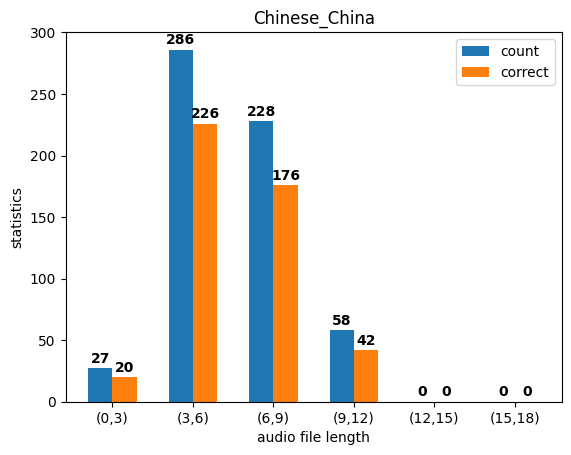

,duration,count,correct,accuracy
0,"(0,3)",27,20,74.07%
1,"(3,6)",286,226,79.02%
2,"(6,9)",228,176,77.19%
3,"(9,12)",58,42,72.41%
4,"(12,15)",0,0,-0.00%
5,"(15,18)",0,0,-0.00%


overall accuracy :: 77.46


In [42]:
get_language_result('Chinese_China')

# English



ENGLISH


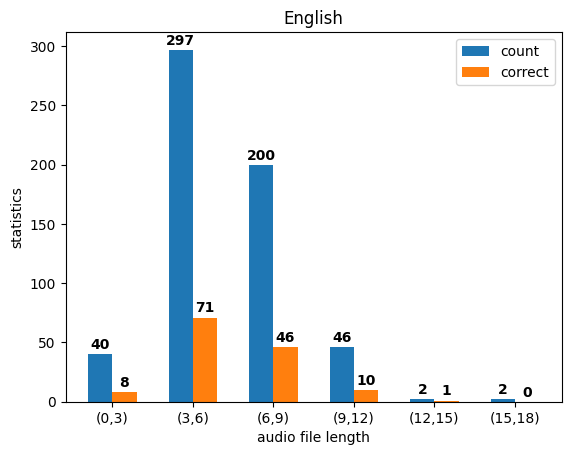

,duration,count,correct,accuracy
0,"(0,3)",40,8,20.00%
1,"(3,6)",297,71,23.91%
2,"(6,9)",200,46,23.00%
3,"(9,12)",46,10,21.74%
4,"(12,15)",2,1,50.00%
5,"(15,18)",2,0,0.00%


overall accuracy :: 23.17


In [24]:
get_language_result('English')